In [10]:
# Cell 1: ÂØºÂÖ•Â∫ìÂíåÁéØÂ¢ÉËÆæÁΩÆ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import math
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# ËÆæÁΩÆÊòæÁ§∫ÂèÇÊï∞
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 6)

print("T002: ÂàÜÂ≠êËøáÊª§ - ADMEÂíåÂÖàÂØºÂåñÂêàÁâ©Áõ∏‰ººÊÄßÊ†áÂáÜ")
print("=" * 60)

# Ê£ÄÊü•RDKit
try:
    from rdkit import Chem
    from rdkit.Chem import Descriptors, Draw, PandasTools
    print("RDKit ÂØºÂÖ•ÊàêÂäü")
except ImportError:
    print("RDKit Êú™ÂÆâË£ÖÔºåËØ∑ËøêË°å: conda install -c conda-forge rdkit")

T002: ÂàÜÂ≠êËøáÊª§ - ADMEÂíåÂÖàÂØºÂåñÂêàÁâ©Áõ∏‰ººÊÄßÊ†áÂáÜ
RDKit ÂØºÂÖ•ÊàêÂäü


In [11]:
# Cell 2: ADMEÁêÜËÆ∫‰ªãÁªç
print("ADMEÊ¶ÇÂøµ:")
print("-" * 40)
print("üîπ A - Absorption (Âê∏Êî∂): ËçØÁâ©Â¶Ç‰ΩïËøõÂÖ•‰∫∫‰Ωì")
print("üîπ D - Distribution (ÂàÜÂ∏É): ËçØÁâ©Â¶Ç‰ΩïÂú®‰ΩìÂÜÖÁßªÂä®") 
print("üîπ M - Metabolism (‰ª£Ë∞¢): ËçØÁâ©Â¶Ç‰ΩïË¢´ÂàÜËß£")
print("üîπ E - Excretion (ÊéíÊ≥Ñ): ËçØÁâ©Â¶Ç‰ΩïË¢´Ê∂àÈô§")

print("\nLipinski‰∫îËßÑÂàô (Rule of Five):")
print("-" * 40)
print("Â¶ÇÊûúÂåñÂêàÁâ©ËøùÂèç‰ª•‰∏ãËßÑÂàô‰∏≠ÁöÑ‰∏§‰∏™ÊàñÊõ¥Â§öÔºåÂàôÂèØËÉΩÂÖ∑ÊúâËæÉÂ∑ÆÁöÑÂè£ÊúçÁîüÁâ©Âà©Áî®Â∫¶Ôºö")
print("‚Ä¢ ÂàÜÂ≠êÈáè ‚â§ 500 Da")
print("‚Ä¢ Ê∞¢ÈîÆÂèó‰ΩìÊï∞ ‚â§ 10") 
print("‚Ä¢ Ê∞¢ÈîÆÁªô‰ΩìÊï∞ ‚â§ 5")
print("‚Ä¢ LogPÂÄº ‚â§ 5")
print("\nËÆ∞‰ΩèÔºöÂè™ÊúâÂΩìËøùÂèçË∂ÖËøá1‰∏™ËßÑÂàôÊó∂ÔºåÂàÜÂ≠êÊâç‰∏çÁ¨¶ÂêàRo5")

ADMEÊ¶ÇÂøµ:
----------------------------------------
üîπ A - Absorption (Âê∏Êî∂): ËçØÁâ©Â¶Ç‰ΩïËøõÂÖ•‰∫∫‰Ωì
üîπ D - Distribution (ÂàÜÂ∏É): ËçØÁâ©Â¶Ç‰ΩïÂú®‰ΩìÂÜÖÁßªÂä®
üîπ M - Metabolism (‰ª£Ë∞¢): ËçØÁâ©Â¶Ç‰ΩïË¢´ÂàÜËß£
üîπ E - Excretion (ÊéíÊ≥Ñ): ËçØÁâ©Â¶Ç‰ΩïË¢´Ê∂àÈô§

Lipinski‰∫îËßÑÂàô (Rule of Five):
----------------------------------------
Â¶ÇÊûúÂåñÂêàÁâ©ËøùÂèç‰ª•‰∏ãËßÑÂàô‰∏≠ÁöÑ‰∏§‰∏™ÊàñÊõ¥Â§öÔºåÂàôÂèØËÉΩÂÖ∑ÊúâËæÉÂ∑ÆÁöÑÂè£ÊúçÁîüÁâ©Âà©Áî®Â∫¶Ôºö
‚Ä¢ ÂàÜÂ≠êÈáè ‚â§ 500 Da
‚Ä¢ Ê∞¢ÈîÆÂèó‰ΩìÊï∞ ‚â§ 10
‚Ä¢ Ê∞¢ÈîÆÁªô‰ΩìÊï∞ ‚â§ 5
‚Ä¢ LogPÂÄº ‚â§ 5

ËÆ∞‰ΩèÔºöÂè™ÊúâÂΩìËøùÂèçË∂ÖËøá1‰∏™ËßÑÂàôÊó∂ÔºåÂàÜÂ≠êÊâç‰∏çÁ¨¶ÂêàRo5


In [12]:
# Cell 3: ÂÆö‰πâÁ§∫‰æãÂàÜÂ≠ê
example_molecules = {
    'ÁéØÂ≠¢Á¥†': 'CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N1)C(C(C)CC=CC)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C',
    'Ê∞ØÊ∞ÆÂπ≥': 'CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C',
    'Œ≤-ËÉ°ËêùÂçúÁ¥†': 'CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2=C(CCCC2(C)C)C)C)C',
    'Â§ßÈ∫ª‰∫åÈÖö': 'CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O'
}

print("Á§∫‰æãÂàÜÂ≠ê (‰∏çÂêåÊÄßË¥®ÁöÑËçØÁâ©):")
print("-" * 50)
for i, (name, smiles) in enumerate(example_molecules.items(), 1):
    print(f"{i}. {name}")
    print(f"   SMILES: {smiles[:60]}...")
    print()

Á§∫‰æãÂàÜÂ≠ê (‰∏çÂêåÊÄßË¥®ÁöÑËçØÁâ©):
--------------------------------------------------
1. ÁéØÂ≠¢Á¥†
   SMILES: CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N...

2. Ê∞ØÊ∞ÆÂπ≥
   SMILES: CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C...

3. Œ≤-ËÉ°ËêùÂçúÁ¥†
   SMILES: CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2=C(CC...

4. Â§ßÈ∫ª‰∫åÈÖö
   SMILES: CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O...



In [13]:
# Cell 4: ÂÆö‰πâRo5ËÆ°ÁÆóÂáΩÊï∞
def calculate_ro5_properties(smiles):
    """
    ËÆ°ÁÆóÂàÜÂ≠êÁöÑLipinski‰∫îËßÑÂàôÊÄßË¥®
    """
    molecule = Chem.MolFromSmiles(smiles)
    
    if molecule is None:
        return pd.Series([None, None, None, None, False], 
                        index=["ÂàÜÂ≠êÈáè", "Ê∞¢ÈîÆÂèó‰ΩìÊï∞", "Ê∞¢ÈîÆÁªô‰ΩìÊï∞", "LogPÂÄº", "Á¨¶ÂêàRo5"])
    
    # ËÆ°ÁÆóRo5Áõ∏ÂÖ≥ÁöÑÂåñÂ≠¶ÊÄßË¥®
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    
    # Ê£ÄÊü•Ro5Êù°‰ª∂
    conditions = [
        molecular_weight <= 500,    # ÂàÜÂ≠êÈáè ‚â§ 500 Da
        n_hba <= 10,               # Ê∞¢ÈîÆÂèó‰ΩìÊï∞ ‚â§ 10
        n_hbd <= 5,                # Ê∞¢ÈîÆÁªô‰ΩìÊï∞ ‚â§ 5
        logp <= 5                  # LogP ‚â§ 5
    ]
    
    # Â¶ÇÊûúËøùÂèçÊù°‰ª∂‰∏çË∂ÖËøá‰∏Ä‰∏™ÔºåÂàôÁ¨¶Âêà‰∫îËßÑÂàô
    ro5_fulfilled = sum(conditions) >= 3
    
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["ÂàÜÂ≠êÈáè", "Ê∞¢ÈîÆÂèó‰ΩìÊï∞", "Ê∞¢ÈîÆÁªô‰ΩìÊï∞", "LogPÂÄº", "Á¨¶ÂêàRo5"]
    )

def analyze_ro5_violations(properties):
    """ÂàÜÊûêËøùÂèç‰∫ÜÂì™‰∫õRo5ËßÑÂàô"""
    violations = []
    if properties["ÂàÜÂ≠êÈáè"] > 500:
        violations.append(f"ÂàÜÂ≠êÈáèËøáÂ§ß ({properties['ÂàÜÂ≠êÈáè']:.1f} > 500)")
    if properties["Ê∞¢ÈîÆÂèó‰ΩìÊï∞"] > 10:
        violations.append(f"Ê∞¢ÈîÆÂèó‰ΩìÊï∞ËøáÂ§ö ({properties['Ê∞¢ÈîÆÂèó‰ΩìÊï∞']} > 10)")
    if properties["Ê∞¢ÈîÆÁªô‰ΩìÊï∞"] > 5:
        violations.append(f"Ê∞¢ÈîÆÁªô‰ΩìÊï∞ËøáÂ§ö ({properties['Ê∞¢ÈîÆÁªô‰ΩìÊï∞']} > 5)")
    if properties["LogPÂÄº"] > 5:
        violations.append(f"LogPÂÄºËøáÈ´ò ({properties['LogPÂÄº']:.2f} > 5)")
    return violations

print("‚úÖ ÂáΩÊï∞ÂÆö‰πâÂÆåÊàê")

‚úÖ ÂáΩÊï∞ÂÆö‰πâÂÆåÊàê


In [14]:
# Cell 5: ÂàÜÊûêÁ§∫‰æãÂàÜÂ≠ê
print("Á§∫‰æãÂàÜÂ≠êÁöÑRo5ÊÄßË¥®ÂàÜÊûê")
print("=" * 60)

example_results = {}

for name, smiles in example_molecules.items():
    print(f"\n{name}:")
    print("-" * 30)
    
    # ËÆ°ÁÆóÊÄßË¥®
    properties = calculate_ro5_properties(smiles)
    example_results[name] = properties
    
    if properties.isna().any():
        print("   SMILESËß£ÊûêÂ§±Ë¥•")
        continue
    
    # ÊòæÁ§∫ÊÄßË¥®
    print(f"   ÂàÜÂ≠êÈáè: {properties['ÂàÜÂ≠êÈáè']:.1f} Da {'‚úÖ' if properties['ÂàÜÂ≠êÈáè'] <= 500 else '‚ùå'}")
    print(f"   Ê∞¢ÈîÆÂèó‰ΩìÊï∞: {properties['Ê∞¢ÈîÆÂèó‰ΩìÊï∞']} {'‚úÖ' if properties['Ê∞¢ÈîÆÂèó‰ΩìÊï∞'] <= 10 else '‚ùå'}")
    print(f"   Ê∞¢ÈîÆÁªô‰ΩìÊï∞: {properties['Ê∞¢ÈîÆÁªô‰ΩìÊï∞']} {'‚úÖ' if properties['Ê∞¢ÈîÆÁªô‰ΩìÊï∞'] <= 5 else '‚ùå'}")
    print(f"   LogPÂÄº: {properties['LogPÂÄº']:.2f} {'‚úÖ' if properties['LogPÂÄº'] <= 5 else '‚ùå'}")
    
    # Ê£ÄÊü•Ro5Á¨¶ÂêàÊÄß
    if properties['Á¨¶ÂêàRo5']:
        print("    ÁªìÊûú: Á¨¶Âêà Lipinski ‰∫îËßÑÂàô")
    else:
        print("    ÁªìÊûú: ‰∏çÁ¨¶Âêà Lipinski ‰∫îËßÑÂàô")
        violations = analyze_ro5_violations(properties)
        for violation in violations:
            print(f"      ‚Ä¢ {violation}")

# ÂàõÂª∫ÁªìÊûúDataFrameÁî®‰∫éÂêéÁª≠ÂàÜÊûê
molecules_df = pd.DataFrame(example_results).T
print(f"\nÊÄªÁªì: {molecules_df['Á¨¶ÂêàRo5'].sum()}/{len(molecules_df)} ‰∏™ÂàÜÂ≠êÁ¨¶ÂêàRo5")

Á§∫‰æãÂàÜÂ≠êÁöÑRo5ÊÄßË¥®ÂàÜÊûê

ÁéØÂ≠¢Á¥†:
------------------------------
   ÂàÜÂ≠êÈáè: 1201.8 Da ‚ùå
   Ê∞¢ÈîÆÂèó‰ΩìÊï∞: 12 ‚ùå
   Ê∞¢ÈîÆÁªô‰ΩìÊï∞: 5 ‚úÖ
   LogPÂÄº: 3.27 ‚úÖ
    ÁªìÊûú: ‰∏çÁ¨¶Âêà Lipinski ‰∫îËßÑÂàô
      ‚Ä¢ ÂàÜÂ≠êÈáèËøáÂ§ß (1201.8 > 500)
      ‚Ä¢ Ê∞¢ÈîÆÂèó‰ΩìÊï∞ËøáÂ§ö (12 > 10)

Ê∞ØÊ∞ÆÂπ≥:
------------------------------
   ÂàÜÂ≠êÈáè: 306.2 Da ‚úÖ
   Ê∞¢ÈîÆÂèó‰ΩìÊï∞: 4 ‚úÖ
   Ê∞¢ÈîÆÁªô‰ΩìÊï∞: 1 ‚úÖ
   LogPÂÄº: 1.68 ‚úÖ
    ÁªìÊûú: Á¨¶Âêà Lipinski ‰∫îËßÑÂàô

Œ≤-ËÉ°ËêùÂçúÁ¥†:
------------------------------
   ÂàÜÂ≠êÈáè: 536.4 Da ‚ùå
   Ê∞¢ÈîÆÂèó‰ΩìÊï∞: 0 ‚úÖ
   Ê∞¢ÈîÆÁªô‰ΩìÊï∞: 0 ‚úÖ
   LogPÂÄº: 12.61 ‚ùå
    ÁªìÊûú: ‰∏çÁ¨¶Âêà Lipinski ‰∫îËßÑÂàô
      ‚Ä¢ ÂàÜÂ≠êÈáèËøáÂ§ß (536.4 > 500)
      ‚Ä¢ LogPÂÄºËøáÈ´ò (12.61 > 5)

Â§ßÈ∫ª‰∫åÈÖö:
------------------------------
   ÂàÜÂ≠êÈáè: 314.2 Da ‚úÖ
   Ê∞¢ÈîÆÂèó‰ΩìÊï∞: 2 ‚úÖ
   Ê∞¢ÈîÆÁªô‰ΩìÊï∞: 2 ‚úÖ
   LogPÂÄº: 5.85 ‚ùå
    ÁªìÊûú: Á¨¶Âêà Lipinski ‰∫îËßÑÂàô

ÊÄªÁªì: 2/4 ‰∏™ÂàÜÂ≠êÁ¨¶ÂêàRo5


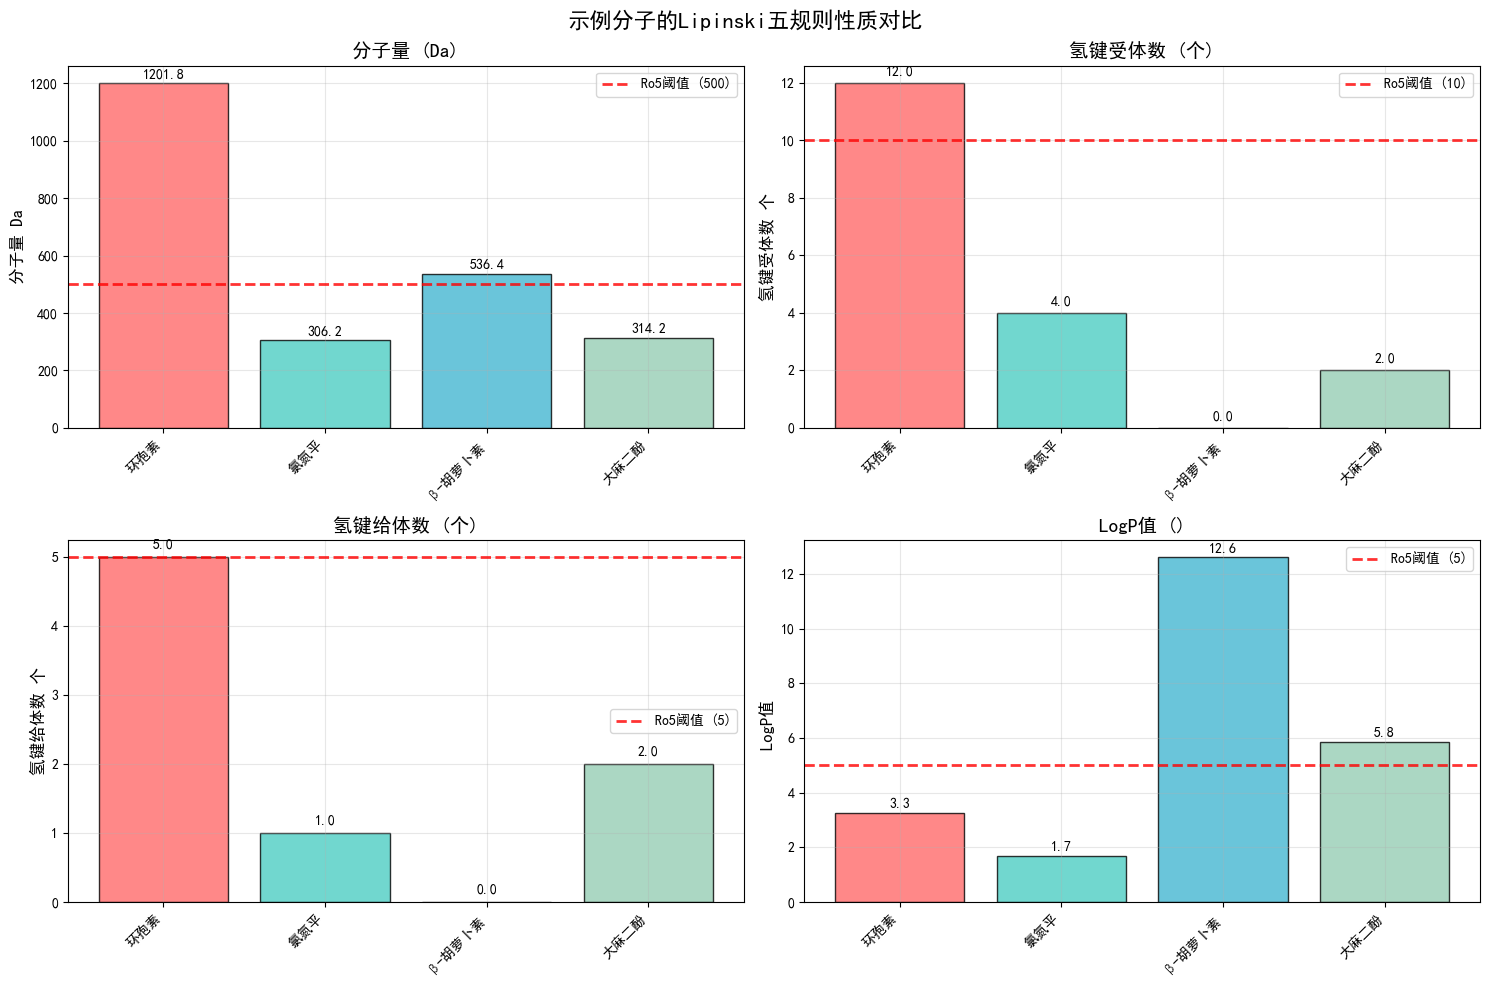

ÂàÜÂ≠êÊÄßË¥®ÂØπÊØîÂõæÂ∑≤ÁîüÊàê


In [15]:
# Cell 6: ÂàõÂª∫ÂàÜÂ≠êÊÄßË¥®ÂØπÊØîÊü±Áä∂Âõæ
molecules_df_clean = molecules_df.dropna()  # ÁßªÈô§Êó†ÊïàÂàÜÂ≠ê

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Á§∫‰æãÂàÜÂ≠êÁöÑLipinski‰∫îËßÑÂàôÊÄßË¥®ÂØπÊØî', fontsize=16, fontweight='bold')

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

# Ro5ÊÄßË¥®ÂíåÈòàÂÄº
properties = [
    ('ÂàÜÂ≠êÈáè', 500, 'Da'),
    ('Ê∞¢ÈîÆÂèó‰ΩìÊï∞', 10, '‰∏™'),
    ('Ê∞¢ÈîÆÁªô‰ΩìÊï∞', 5, '‰∏™'),
    ('LogPÂÄº', 5, '')
]

for idx, (prop, threshold, unit) in enumerate(properties):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]
    
    # ÁªòÂà∂Êü±Áä∂Âõæ
    bars = ax.bar(range(len(molecules_df_clean)), molecules_df_clean[prop], 
                 color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    
    # Ê∑ªÂä†ÈòàÂÄºÁ∫ø
    ax.axhline(y=threshold, color='red', linestyle='--', linewidth=2, 
              alpha=0.8, label=f'Ro5ÈòàÂÄº ({threshold})')
    
    # ËÆæÁΩÆÊ†áÈ¢òÂíåÊ†áÁ≠æ
    ax.set_title(f'{prop} ({unit})', fontsize=14, fontweight='bold')
    ax.set_ylabel(f'{prop} {unit}', fontsize=12)
    ax.set_xticks(range(len(molecules_df_clean)))
    ax.set_xticklabels(molecules_df_clean.index, rotation=45, ha='right', fontsize=10)
    
    # Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + threshold*0.02,
               f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Ê∑ªÂä†ÁΩëÊ†ºÂíåÂõæ‰æã
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

print("ÂàÜÂ≠êÊÄßË¥®ÂØπÊØîÂõæÂ∑≤ÁîüÊàê")

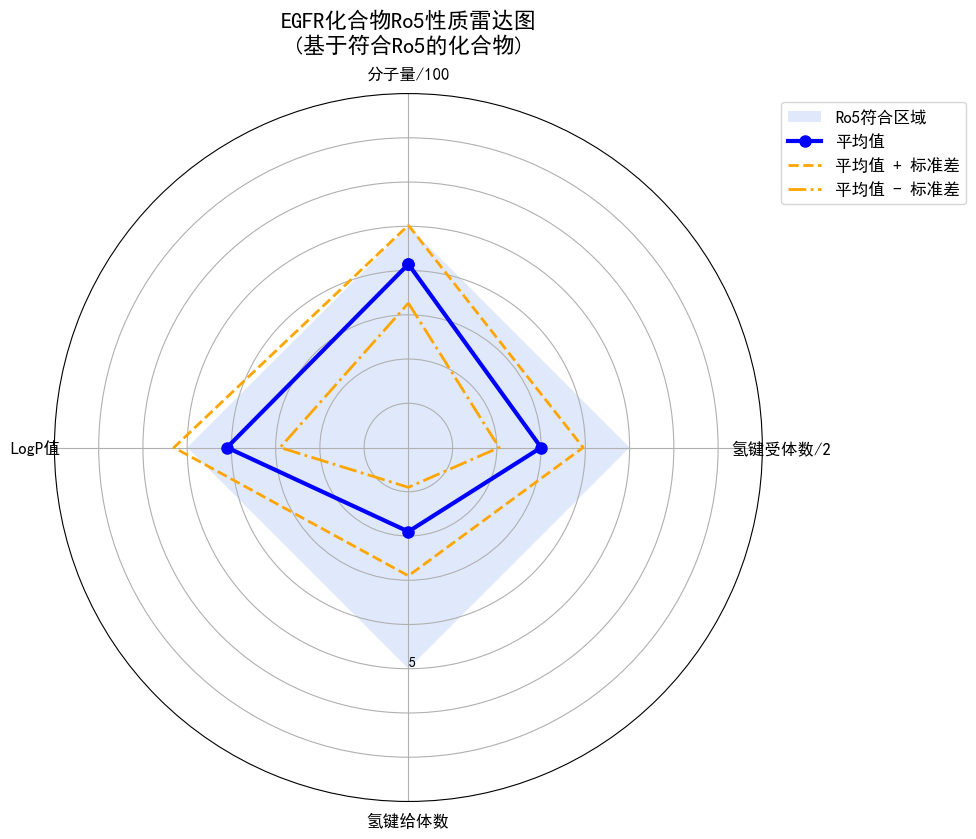

Èõ∑ËææÂõæÂ∑≤ÁîüÊàê


In [16]:
# Cell 7: ÂàõÂª∫Èõ∑ËææÂõæ
def create_radar_plot():
    """ÂàõÂª∫Èõ∑ËææÂõæÊòæÁ§∫ÂàÜÂ≠êÊÄßË¥®"""
    
    # Ê®°ÊãüEGFRÊï∞ÊçÆÈõÜÁªüËÆ°ÔºàÂü∫‰∫éÁúüÂÆûÊï∞ÊçÆÁöÑËøë‰ººÂÄºÔºâ
    stats_data = {
        'ÂàÜÂ≠êÈáè': {'mean': 414.4, 'std': 88.0},
        'Ê∞¢ÈîÆÂèó‰ΩìÊï∞': {'mean': 6.0, 'std': 1.9},
        'Ê∞¢ÈîÆÁªô‰ΩìÊï∞': {'mean': 1.9, 'std': 1.0},
        'LogPÂÄº': {'mean': 4.1, 'std': 1.2}
    }
    
    # ËΩ¨Êç¢‰∏∫DataFrame
    stats_df = pd.DataFrame(stats_data).T
    
    # Áº©ÊîæÂáΩÊï∞
    def scale_by_thresholds(data, thresholds, target_scale):
        scaled_data = data.copy()
        for prop in data.index:
            if prop in thresholds:
                scaled_data.loc[prop] = data.loc[prop] / thresholds[prop] * target_scale
        return scaled_data
    
    # ËÆæÁΩÆÂèÇÊï∞
    thresholds = {'ÂàÜÂ≠êÈáè': 500, 'Ê∞¢ÈîÆÂèó‰ΩìÊï∞': 10, 'Ê∞¢ÈîÆÁªô‰ΩìÊï∞': 5, 'LogPÂÄº': 5}
    scaled_threshold = 5
    properties_labels = ['ÂàÜÂ≠êÈáè/100', 'Ê∞¢ÈîÆÂèó‰ΩìÊï∞/2', 'Ê∞¢ÈîÆÁªô‰ΩìÊï∞', 'LogPÂÄº']
    
    # ÂÆö‰πâËßíÂ∫¶
    angles = [i / float(len(stats_df)) * 2 * math.pi for i in range(len(stats_df))]
    angles += angles[:1]  # Èó≠ÂêàÂõæÂΩ¢
    
    # Áº©ÊîæÊï∞ÊçÆ
    y_scaled = scale_by_thresholds(stats_df, thresholds, scaled_threshold)
    y_scaled = pd.concat([y_scaled, y_scaled.head(1)])  # Èó≠ÂêàÊï∞ÊçÆ
    
    # ÂàõÂª∫Èõ∑ËææÂõæ
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # ÁªòÂà∂Ro5Á¨¶ÂêàÂå∫Âüü
    ax.fill(angles, [scaled_threshold] * len(angles), 'cornflowerblue', 
           alpha=0.2, label='Ro5Á¨¶ÂêàÂå∫Âüü')
    
    # ÁªòÂà∂Êï∞ÊçÆÁ∫ø
    ax.plot(angles, y_scaled['mean'], 'blue', lw=3, ls='-', 
           label='Âπ≥ÂùáÂÄº', marker='o', markersize=8)
    ax.plot(angles, y_scaled['mean'] + y_scaled['std'], 'orange', 
           lw=2, ls='--', label='Âπ≥ÂùáÂÄº + Ê†áÂáÜÂ∑Æ')
    ax.plot(angles, y_scaled['mean'] - y_scaled['std'], 'orange', 
           lw=2, ls='-.', label='Âπ≥ÂùáÂÄº - Ê†áÂáÜÂ∑Æ')
    
    # ËÆæÁΩÆÊ†∑Âºè
    ax.set_theta_offset(math.pi / 2)  # 0Â∫¶Âú®È°∂ÈÉ®
    ax.set_theta_direction(-1)        # È°∫Êó∂Èíà
    ax.set_rlabel_position(180)       # yËΩ¥Ê†áÁ≠æ‰ΩçÁΩÆ
    
    # ËÆæÁΩÆÊ†áÁ≠æÂíåÂàªÂ∫¶
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(properties_labels, fontsize=12)
    ax.set_ylim(0, 8)
    ax.set_yticks(range(1, 8))
    ax.set_yticklabels([str(i) if i == scaled_threshold else '' for i in range(1, 8)])
    
    # Ê∑ªÂä†Ê†áÈ¢òÂíåÂõæ‰æã
    ax.set_title('EGFRÂåñÂêàÁâ©Ro5ÊÄßË¥®Èõ∑ËææÂõæ\n(Âü∫‰∫éÁ¨¶ÂêàRo5ÁöÑÂåñÂêàÁâ©)', 
                fontsize=16, fontweight='bold', pad=30)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=12)
    
    plt.tight_layout()
    plt.show()

create_radar_plot()
print("Èõ∑ËææÂõæÂ∑≤ÁîüÊàê")

In [17]:
# Cell 8: Â∞ùËØïÂä†ËΩΩT001Êï∞ÊçÆËøõË°åÂàÜÊûê
print("Â∞ùËØïÂä†ËΩΩT001Êï∞ÊçÆËøõË°åÂ§ßËßÑÊ®°ÂàÜÊûê...")

# Êü•ÊâæÂèØËÉΩÁöÑÊï∞ÊçÆÊñá‰ª∂
possible_files = [
    'EGFR_compounds.csv',
    'egfr_compounds.csv', 
    'compounds.csv',
    'chembl_data.csv'
]

dataset = None
for filename in possible_files:
    if Path(filename).exists():
        try:
            dataset = pd.read_csv(filename)
            print(f"ÊàêÂäüÂä†ËΩΩÊï∞ÊçÆÈõÜ: {filename}")
            print(f"   Êï∞ÊçÆÈõÜÂΩ¢Áä∂: {dataset.shape}")
            print(f"   ÂàóÂêç: {list(dataset.columns)}")
            break
        except Exception as e:
            print(f" Âä†ËΩΩ {filename} Â§±Ë¥•: {e}")

if dataset is None:
    print("Êú™ÊâæÂà∞T001Êï∞ÊçÆÊñá‰ª∂")
    print(" ÊèêÁ§∫: Â¶ÇÊûú‰Ω†ÊúâT001ÁöÑÊï∞ÊçÆÊñá‰ª∂ÔºåËØ∑Á°Æ‰øùÊñá‰ª∂Âú®ÂΩìÂâçÁõÆÂΩï‰∏ã")
else:
    # ÊâæÂà∞SMILESÂàó
    smiles_col = None
    for col in dataset.columns:
        if 'smiles' in col.lower():
            smiles_col = col
            break
    
    if smiles_col:
        print(f"ÊâæÂà∞SMILESÂàó: {smiles_col}")
        
        # ÂàÜÊûêÂâç10‰∏™ÂàÜÂ≠ê‰Ωú‰∏∫Á§∫‰æã
        print(f"\nÂàÜÊûêÂâç10‰∏™ÂàÜÂ≠êÁöÑRo5ÊÄßË¥®...")
        sample_data = dataset.head(10)
        
        for idx, row in sample_data.iterrows():
            if pd.notna(row[smiles_col]):
                props = calculate_ro5_properties(row[smiles_col])
                if not props.isna().any():
                    status = "‚úÖ" if props['Á¨¶ÂêàRo5'] else "‚ùå"
                    print(f"ÂàÜÂ≠ê {idx+1}: {status} (MW:{props['ÂàÜÂ≠êÈáè']:.1f}, LogP:{props['LogPÂÄº']:.2f})")

Â∞ùËØïÂä†ËΩΩT001Êï∞ÊçÆËøõË°åÂ§ßËßÑÊ®°ÂàÜÊûê...
Êú™ÊâæÂà∞T001Êï∞ÊçÆÊñá‰ª∂
 ÊèêÁ§∫: Â¶ÇÊûú‰Ω†ÊúâT001ÁöÑÊï∞ÊçÆÊñá‰ª∂ÔºåËØ∑Á°Æ‰øùÊñá‰ª∂Âú®ÂΩìÂâçÁõÆÂΩï‰∏ã


In [18]:
# Cell 9: È°πÁõÆÊÄªÁªì
print("üéØ T002È°πÁõÆÂÆåÊàêÊÄªÁªì")
print("=" * 60)
print("‚úÖ Â≠¶‰π†ÊàêÊûú:")
print("   1. ÁêÜËß£‰∫ÜADMEÊ¶ÇÂøµÂíåËçØÁâ©Âä®ÂäõÂ≠¶")
print("   2. ÊéåÊè°‰∫ÜLipinski‰∫îËßÑÂàôÁöÑÂõõ‰∏™Ê†áÂáÜ")
print("   3. Â≠¶‰ºö‰ΩøÁî®RDKitËÆ°ÁÆóÂàÜÂ≠êÊèèËø∞Á¨¶")
print("   4. ÂàÜÊûê‰∫Ü‰∏çÂêåÁ±ªÂûãÂàÜÂ≠êÁöÑËçØÁâ©Ê†∑ÊÄßË¥®")
print("   5. ÂàõÂª∫‰∫Ü‰∏ì‰∏öÁöÑÂàÜÂ≠êÊÄßË¥®ÂèØËßÜÂåñ")
print("   6. Â∫îÁî®Ro5ÂéüÁêÜÁ≠õÈÄâÂåñÂêàÁâ©")

print(f"\n Lipinski‰∫îËßÑÂàôÊÄªÁªì:")
print("   ÂàÜÂ≠êÈáè ‚â§ 500 Da")
print("   Ê∞¢ÈîÆÂèó‰ΩìÊï∞ ‚â§ 10")
print("   Ê∞¢ÈîÆÁªô‰ΩìÊï∞ ‚â§ 5") 
print("   LogPÂÄº ‚â§ 5")
print("   ËøùÂèçËßÑÂàôÊï∞ ‚â§ 1 (ÊâçÁÆóÁ¨¶Âêà)")

print(f"\nÁ§∫‰æãÂàÜÂ≠êÁªìÊûú:")
for name, properties in example_results.items():
    if not properties.isna().any():
        status = "Á¨¶Âêà" if properties['Á¨¶ÂêàRo5'] else "‰∏çÁ¨¶Âêà"
        mw = properties['ÂàÜÂ≠êÈáè']
        logp = properties['LogPÂÄº']
        print(f"   {name}: {status} Ro5 (MW:{mw:.1f}, LogP:{logp:.2f})")

print(f"\n ÊÅ≠ÂñúÂÆåÊàê T002: ÂàÜÂ≠êËøáÊª§ - ADMEÂíåÂÖàÂØºÂåñÂêàÁâ©Áõ∏‰ººÊÄßÊ†áÂáÜÔºÅ")
print(f" ‰∏ã‰∏ÄÊ≠•: ÂèØ‰ª•ÁªßÁª≠Â≠¶‰π† T003 (ÂàÜÂ≠êËøáÊª§Ôºö‰∏çËâØÂ≠êÁªìÊûÑ)")

üéØ T002È°πÁõÆÂÆåÊàêÊÄªÁªì
‚úÖ Â≠¶‰π†ÊàêÊûú:
   1. ÁêÜËß£‰∫ÜADMEÊ¶ÇÂøµÂíåËçØÁâ©Âä®ÂäõÂ≠¶
   2. ÊéåÊè°‰∫ÜLipinski‰∫îËßÑÂàôÁöÑÂõõ‰∏™Ê†áÂáÜ
   3. Â≠¶‰ºö‰ΩøÁî®RDKitËÆ°ÁÆóÂàÜÂ≠êÊèèËø∞Á¨¶
   4. ÂàÜÊûê‰∫Ü‰∏çÂêåÁ±ªÂûãÂàÜÂ≠êÁöÑËçØÁâ©Ê†∑ÊÄßË¥®
   5. ÂàõÂª∫‰∫Ü‰∏ì‰∏öÁöÑÂàÜÂ≠êÊÄßË¥®ÂèØËßÜÂåñ
   6. Â∫îÁî®Ro5ÂéüÁêÜÁ≠õÈÄâÂåñÂêàÁâ©

 Lipinski‰∫îËßÑÂàôÊÄªÁªì:
   ÂàÜÂ≠êÈáè ‚â§ 500 Da
   Ê∞¢ÈîÆÂèó‰ΩìÊï∞ ‚â§ 10
   Ê∞¢ÈîÆÁªô‰ΩìÊï∞ ‚â§ 5
   LogPÂÄº ‚â§ 5
   ËøùÂèçËßÑÂàôÊï∞ ‚â§ 1 (ÊâçÁÆóÁ¨¶Âêà)

Á§∫‰æãÂàÜÂ≠êÁªìÊûú:
   ÁéØÂ≠¢Á¥†: ‰∏çÁ¨¶Âêà Ro5 (MW:1201.8, LogP:3.27)
   Ê∞ØÊ∞ÆÂπ≥: Á¨¶Âêà Ro5 (MW:306.2, LogP:1.68)
   Œ≤-ËÉ°ËêùÂçúÁ¥†: ‰∏çÁ¨¶Âêà Ro5 (MW:536.4, LogP:12.61)
   Â§ßÈ∫ª‰∫åÈÖö: Á¨¶Âêà Ro5 (MW:314.2, LogP:5.85)

 ÊÅ≠ÂñúÂÆåÊàê T002: ÂàÜÂ≠êËøáÊª§ - ADMEÂíåÂÖàÂØºÂåñÂêàÁâ©Áõ∏‰ººÊÄßÊ†áÂáÜÔºÅ
 ‰∏ã‰∏ÄÊ≠•: ÂèØ‰ª•ÁªßÁª≠Â≠¶‰π† T003 (ÂàÜÂ≠êËøáÊª§Ôºö‰∏çËâØÂ≠êÁªìÊûÑ)
